In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4,130.0,322.0,NaN,2.0,109.0,0,NaN,2.0,3.0,3.0
1,0.0,67.0,3,115.0,564.0,0.0,2.0,160.0,0,1.6,2.0,0.0,7.0
2,1.0,57.0,2,124.0,261.0,0.0,0.0,141.0,0,0.3,1.0,NaN,7.0
3,NaN,64.0,4,128.0,263.0,NaN,0.0,105.0,1,0.2,2.0,1.0,7.0
4,0.0,74.0,2,120.0,269.0,0.0,2.0,121.0,1,NaN,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3,172.0,199.0,1.0,0.0,162.0,0,NaN,1.0,0.0,7.0
266,1.0,44.0,2,120.0,263.0,0.0,0.0,173.0,0,0.0,1.0,0.0,7.0
267,NaN,56.0,2,140.0,294.0,0.0,2.0,153.0,0,1.3,2.0,0.0,3.0
268,1.0,57.0,4,140.0,192.0,0.0,0.0,148.0,0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	29
float64		column 2	7
int64		column 3	0
float64		column 4	14
float64		column 5	14
float64		column 6	28
float64		column 7	8
float64		column 8	7
int64		column 9	0
float64		column 10	22
float64		column 11	14
float64		column 12	14
float64		column 13	14


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,241.000000,263.000000,270.000000,256.000000,256.000000,242.000000,262.000000,263.000000,270.000000,248.000000,256.000000,256.000000,256.000000
mean,0.684647,54.547529,3.174074,130.906250,249.574219,0.152893,1.030534,149.821293,0.329630,0.985081,1.566406,0.640625,4.710938
std,0.465623,9.047195,0.950090,17.428144,51.291883,0.360630,0.997613,23.171004,0.470952,1.111433,0.596957,0.909509,1.940901
min,0.000000,29.000000,1.000000,94.000000,141.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,213.750000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,244.500000,0.000000,2.000000,153.000000,0.000000,0.750000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,276.250000,0.000000,2.000000,167.500000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

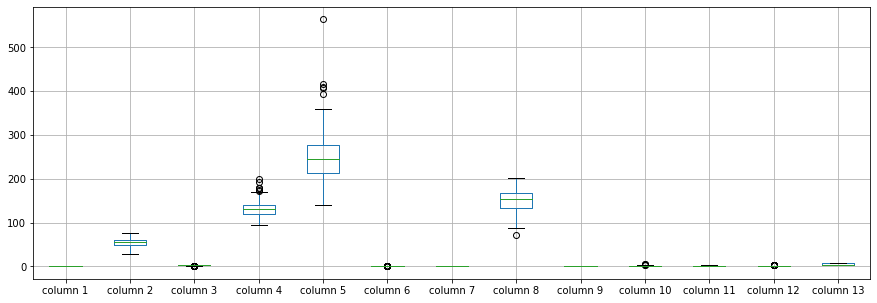

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.684647
column 2      54.547529
column 3       3.174074
column 4     130.906250
column 5     249.574219
column 6       0.152893
column 7       1.030534
column 8     149.821293
column 9       0.329630
column 10      0.985081
column 11      1.566406
column 12      0.640625
column 13      4.710938
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.134717,-0.008768,-0.015093,-0.218893,0.092111,0.070311,-0.046855,0.164097,0.106629,0.049181,0.056441,0.393426
column 2,-0.134717,1.000000,0.108844,0.268794,0.214777,0.150291,0.126446,-0.399448,0.091900,0.201113,0.195117,0.336583,0.083781
column 3,-0.008768,0.108844,1.000000,-0.071048,0.070578,-0.112766,0.078955,-0.316507,0.353160,0.137523,0.158120,0.228147,0.259100
column 4,-0.015093,0.268794,-0.071048,1.000000,0.158938,0.193228,0.152241,-0.021012,0.050532,0.173754,0.151238,0.131916,0.150496
column 5,-0.218893,0.214777,0.070578,0.158938,1.000000,0.037883,0.137097,-0.004809,0.053200,-0.019954,0.011977,0.096418,0.034307
column 6,0.092111,0.150291,-0.112766,0.193228,0.037883,1.000000,0.051907,0.008040,0.001827,-0.044836,-0.011004,0.141885,0.017345
column 7,0.070311,0.126446,0.078955,0.152241,0.137097,0.051907,1.000000,-0.106593,0.101012,0.129360,0.158823,0.090186,0.015895
column 8,-0.046855,-0.399448,-0.316507,-0.021012,-0.004809,0.008040,-0.106593,1.000000,-0.364706,-0.323317,-0.423540,-0.256740,-0.237289
column 9,0.164097,0.091900,0.353160,0.050532,0.053200,0.001827,0.101012,-0.364706,1.000000,0.258082,0.267759,0.136322,0.302531
column 10,0.106629,0.201113,0.137523,0.173754,-0.019954,-0.044836,0.129360,-0.323317,0.258082,1.000000,0.585372,0.192933,0.333876


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+26,13+26+26,13+26+26+26,13+26+26+26+26,13+26+26+26+26+26,13+26+26+26+26,13+26+26+26,13+26+26,13+26,13], vae_layer = False, seed = 26)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 581.2855415344238
Epoch: 1 , loss: 584.6103897094727
Epoch: 2 , loss: 580.8313789367676
Epoch: 3 , loss: 579.6751327514648
Epoch: 4 , loss: 582.2471237182617
Epoch: 5 , loss: 583.292106628418
Epoch: 6 , loss: 582.2457618713379
Epoch: 7 , loss: 584.289981842041
Epoch: 8 , loss: 583.4639358520508
Epoch: 9 , loss: 582.2529029846191
Epoch: 10 , loss: 581.14453125
Epoch: 11 , loss: 581.4131660461426
Epoch: 12 , loss: 582.6593894958496
Epoch: 13 , loss: 582.2625198364258
Epoch: 14 , loss: 584.9304122924805
Epoch: 15 , loss: 580.4421157836914
Epoch: 16 , loss: 581.976936340332
Epoch: 17 , loss: 583.5617065429688
Epoch: 18 , loss: 581.9898452758789
Epoch: 19 , loss: 583.0120277404785
Epoch: 20 , loss: 582.6247596740723
Epoch: 21 , loss: 583.7313499450684
Epoch: 22 , loss: 582.104377746582
Epoch: 23 , loss: 581.3111763000488
Epoch: 24 , loss: 580.9804878234863
Epoch: 25 , loss: 583.088321685791
Epoch: 26 , loss

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.000000
column 2       0.032513
column 3       2.000000
column 4     130.000000
column 5     245.000000
column 6       0.014009
column 7       2.000000
column 8     180.000000
column 9       0.000000
column 10      0.200000
column 11      2.000000
column 12      0.000000
column 13      3.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.0,0,0.0,0.000000,0.015808,0.0,0.0,0,-2.363784,0.0,0.000000,0.0
1,0.000000,0.0,0,0.0,0.000000,0.000000,0.0,0.0,0,0.000000,0.0,0.000000,0.0
2,0.000000,0.0,0,0.0,0.000000,0.000000,0.0,0.0,0,0.000000,0.0,0.027575,0.0
3,-0.966409,0.0,0,0.0,0.000000,0.014719,0.0,0.0,0,0.000000,0.0,0.000000,0.0
4,0.000000,0.0,0,0.0,0.000000,0.000000,0.0,0.0,0,-0.164971,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.000000,0.0,0,0.0,0.000000,0.000000,0.0,0.0,0,-0.467593,0.0,0.000000,0.0
266,0.000000,0.0,0,0.0,0.000000,0.000000,0.0,0.0,0,0.000000,0.0,0.000000,0.0
267,0.034194,0.0,0,0.0,0.000000,0.000000,0.0,0.0,0,0.000000,0.0,0.000000,0.0
268,0.000000,0.0,0,0.0,0.000000,0.000000,0.0,0.0,0,0.000000,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1173.9610714120738, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.21680789560753774

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.000000,70.0,4,130.0,322.000000,0.015808,2.0,109.0,0,0.036216,2.0,3.000000,3.0
1,0.000000,67.0,3,115.0,564.000000,0.000000,2.0,160.0,0,1.600000,2.0,0.000000,7.0
2,1.000000,57.0,2,124.0,261.000000,0.000000,0.0,141.0,0,0.300000,1.0,0.027575,7.0
3,0.033591,64.0,4,128.0,263.000000,0.014719,0.0,105.0,1,0.200000,2.0,1.000000,7.0
4,0.000000,74.0,2,120.0,269.000000,0.000000,2.0,121.0,1,0.035029,1.0,1.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.000000,52.0,3,172.0,199.000000,1.000000,0.0,162.0,0,0.032407,1.0,0.000000,7.0
266,1.000000,44.0,2,120.0,263.000000,0.000000,0.0,173.0,0,0.000000,1.0,0.000000,7.0
267,0.034194,56.0,2,140.0,294.000000,0.000000,2.0,153.0,0,1.300000,2.0,0.000000,3.0
268,1.000000,57.0,4,140.0,192.000000,0.000000,0.0,148.0,0,0.400000,2.0,0.000000,6.0


In [20]:
imputations[-1].to_excel("Sheart_NW_5(imp).xlsx", index=False, header=False)